# 1 Notional Value Calculator
The **Notional Value Calculator** is used to determine the total value of a financial contract or position. 
For commodities, it is calculated as the price per unit multiplied by the quantity. 
For stock indexes, it is calculated as the index level multiplied by the contract multiplier.

In [5]:
# Notional Value Calculator
def calculate_notional_value(price_per_unit, quantity, index_level=None, multiplier=None):
    """
    Calculate the notional value of a financial contract.

    Parameters:
    - price_per_unit (float): Price per unit of the commodity or asset
    - quantity (int): Number of units/contracts
    - index_level (float, optional): The index level for stock index
    - multiplier (int, optional): The multiplier for the index

    Returns:
    - float: The notional value of the contract
    """
    if index_level and multiplier:
        return index_level * multiplier
    else:
        return price_per_unit * quantity

### **Example Usage**

```python
# Commodities
calculate_notional_value(price_per_unit=70, quantity=100)  # Output: 7000

# Stock Index
calculate_notional_value(index_level=4200, multiplier=50)  # Output: 210000 
```

# 2 Buy and Sell Order Simulator
This function simulates a **Long Position** (buy low, sell high) or a **Short Position** (sell high, buy low).
The P&L is calculated based on the difference between the market price and the entry price.

In [6]:
# Buy and Sell Order Simulator
def buy_sell_order_simulator(entry_price, market_price, position_type, quantity=1):
    """
    Simulate a buy or sell order for a financial contract.

    Parameters:
    - entry_price (float): The price at which the position was opened
    - market_price (float): The current market price of the asset
    - position_type (str): "long" or "short"
    - quantity (int): Number of contracts or shares

    Returns:
    - float: The net profit or loss from the position
    """
    if position_type.lower() == 'long':
        pnl = (market_price - entry_price) * quantity
    elif position_type.lower() == 'short':
        pnl = (entry_price - market_price) * quantity
    else:
        raise ValueError("Position type must be 'long' or 'short'")
    return pnl

### **Example Usage**
```python
# Long Position
buy_sell_order_simulator(entry_price=100, market_price=110, position_type='long')  # Output: 10

# Short Position
buy_sell_order_simulator(entry_price=100, market_price=90, position_type='short')  # Output: 10
```

# 3 Margin Requirement Simulation
This function simulates the margin requirements for a futures position.
If the account balance drops below the maintenance margin, a margin call is triggered.

In [7]:
# Margin Requirement Simulation
def margin_requirement(initial_margin, maintenance_margin, current_balance, market_price, entry_price, position_type):
    """
    Simulate margin requirements and check if a margin call is required.

    Parameters:
    - initial_margin (float): The initial capital required to open the position
    - maintenance_margin (float): The minimum capital required to maintain the position
    - current_balance (float): The trader's current margin account balance
    - market_price (float): The current market price of the asset
    - entry_price (float): The price at which the position was opened
    - position_type (str): "long" or "short"

    Returns:
    - dict: New balance and whether a margin call is required
    """
    pnl = buy_sell_order_simulator(entry_price, market_price, position_type)
    new_balance = current_balance + pnl
    margin_call = new_balance < maintenance_margin
    return {
        "New Balance": new_balance,
        "Margin Call Required": margin_call
    }

### **Example Usage**

In [8]:
# Example: Margin Requirement Check
result = margin_requirement(
    initial_margin=1000,
    maintenance_margin=800,
    current_balance=1200,
    market_price=95,
    entry_price=100,
    position_type='long'
)

# Display the result
print(result)

{'New Balance': 1195, 'Margin Call Required': False}


# 4 Margin Visualisation 
This function visualises the effect of price movements on margin requirements and visualises when a margin call would be required.

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Margin Visualization with Scenario Analysis
def margin_visualisation(entry_price, initial_margin, maintenance_margin, starting_balance, price_range=(50, 150)):
    """
    Visualize the effect of price movements on margin requirements and margin calls,
    including scenario analysis for +10% and -10% price shocks.
    """
    prices = np.linspace(price_range[0], price_range[1], 100)
    long_pnl = (prices - entry_price)
    short_pnl = (entry_price - prices)
    
    # Margin balances
    long_balance = starting_balance + long_pnl
    short_balance = starting_balance + short_pnl

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(prices, long_balance, label="Long Position Balance", color='green')
    plt.plot(prices, short_balance, label="Short Position Balance", color='red')
    plt.axhline(initial_margin, color='blue', linestyle='--', label='Initial Margin')
    plt.axhline(maintenance_margin, color='orange', linestyle='--', label='Maintenance Margin')
    plt.fill_between(prices, maintenance_margin, long_balance, where=(long_balance < maintenance_margin), color='red', alpha=0.3, label='Margin Call Area (Long)')
    plt.fill_between(prices, maintenance_margin, short_balance, where=(short_balance < maintenance_margin), color='red', alpha=0.3, label='Margin Call Area (Short)')
    plt.axvline(entry_price, color='black', linestyle='--', label='Entry Price')
    plt.title("Margin Visualisation")
    plt.xlabel('Market Price')
    plt.ylabel('Account Balance ($)')
    plt.legend()
    plt.grid(True)
    plt.show()

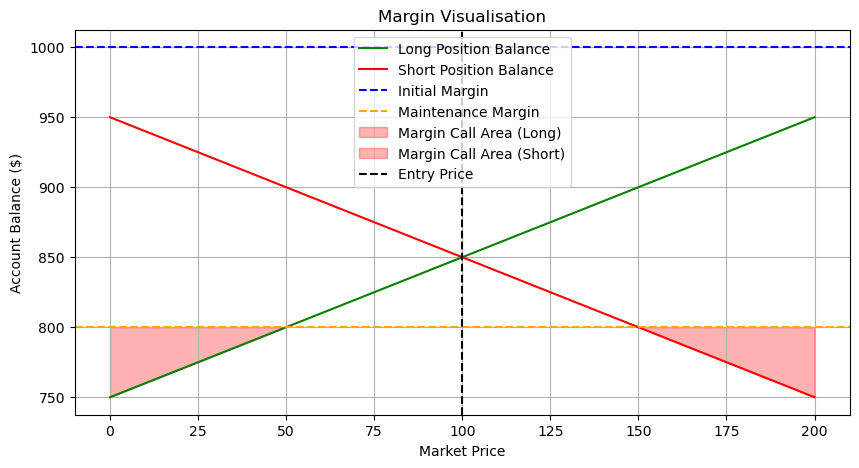

In [30]:
margin_visualisation(entry_price=100, initial_margin=1000, maintenance_margin=800, starting_balance=850, price_range=(0,200))